## Sampling from an Arbitrary Discrete Distribution

The `scipy.stats.rv_discrete` package only supports discrete distributions with integer values. In this exercise, you will write a function `sample(probabilities,values)` that takes two inputs:
- `probabilities`: a list of non-negative numbers adding up to one.
- `values`: a list of numerical values, not necessarily positive or integer. 
The function should return a random value from the list `values`, based on the corresponding probabilities.

For example, the code
```
sample([0.5,0.1,0.4],[3.5,-1,4.2])
```

Should return 3.5 with probability .5, -1 with probability 0.1, and 4.2 with probability 0.4.

Write your function in the code cell below, and test it by drawing 10,000 samples and checking whether the frequencies of values correspond approximately to the probabilities you input.

**Hint:**
You can sample from an arbitrary discrete distribution by first drawing a uniformly random sample from 0 to 1, using the `np.random.random()` function or the `scipy.stats.uniform` package. Call this uniform random sample `z`. Then in the above example, you would return 3.5 if `z` is between 0 and 0.5, return -1 if `z` is between 0.5 and 0.6, and return 4.2 if `z` is between 0.6 and 1.

In [196]:
from scipy.stats import uniform
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
def sample(probabilities,values):
    if sum(probabilities)!=1:
        print("Sum of probability should equal 1")
    elif len(probabilities)!=len(values):
        print("Size of the probabilities and values should be the same")
    else:
        total=[]
        for i in range(len(probabilities)):
            if probabilities[i]<0:
                print("Probability should be 0-1")
                break
            total.append(sum(probabilities[:i+1]))
        if len(total)==len(probabilities):
            val=[]
            samp=uniform(0,1).rvs(size=10000)
            for i in samp:
                if i<total[0]:
                    val.append(values[0])
                else:
                    for j in range(len(total)-1):
                        if ((i-total[j])*(i-total[j+1])<0):
                            break
                    val.append(values[j+1])
    return val

In [206]:
data=pd.DataFrame(sample([0.5,0.1,0.4],[3.5,-1,4.2]))

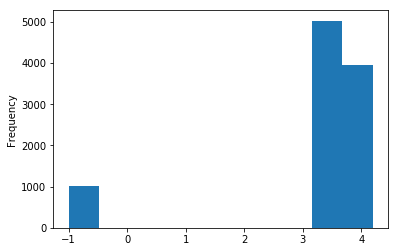

In [212]:
data.plot(kind='hist').legend_.remove()

## Q8. Simulating Distribution of Daily Earnings at Rockport

In this exercise, you will use the `scipy.stats` package to generate normal and general discrete samples, in order to plot the shape of the probability distributions of the daily earnings from using Rockport in the example in DMD 5.1 (from pre-class readings). Simulate 10000 samples and plot the frequency instead of the density. You should also include the proper titles and labels of the x and y axis. Write your code in the code cell below (a correct sample graph is below).

**Hints:**
See page 196-197 in DMD for description of the distribution. It has the form $price*min(demand,3500)-10000$, where price is normally distributed with mean $\mu = 3.65$ and standard deviation of $\sigma=0.2$, demand follows a discrete distribution, as in the following table. (You can either use your code from Q7 to sample from the discrete distribution, or use `scipy.stats.rv_discrete` since all the values are integers. Or you can try both and see if the results are approximately the same.) You should make the price zero whenever you get a negative sample.

| Demand (lbs of codfish) | Probability |
|--|--|
|0 | 0.02|
|1000|0.03|
|2000|0.05|
|3000|0.08|
|4000|0.33|
|5000|0.29|
|6000|0.20|



In [224]:
D=[]
for i in range(7): D.append(1000*i)

In [230]:
Prob=[0.02,0.03,0.05,0.08,0.33,0.29,0.2]

In [231]:
Demand=sample(Prob,D)

In [232]:
P=norm(3.65,0.2).rvs(size=10000)

In [240]:
R=[]
for i in range(10000):
    R.append(P[i]*min(Demand[i],3500)-10000)

Text(0.5,1,'Distribution of earnings from Rockport (10000 simulations)')

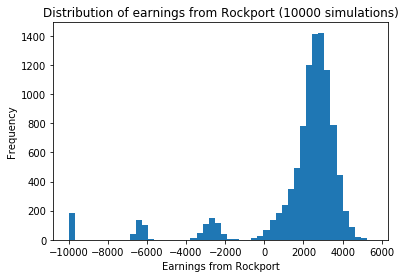

In [249]:
earnings=pd.DataFrame(R)
earnings.plot(kind='hist',bins=50).legend_.remove()
plt.xlabel('Earnings from Rockport')
plt.title('Distribution of earnings from Rockport (10000 simulations)')